# Residuals

The purpose of this notebook is to analyze whether excluding all but the 14 cascades present in `../levelfiles/v3_natSi` results has a noticeable effect on the resulting spectrum. For reproducibility, data was produced using the following command:

```
./realizeCascades -n 1000000000 -d0 -o natSi_all.root levelfiles/under-development/natSi_all.txt
```

In [1]:
#Setup

#"Standard" Libraries
import uproot, pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.style.use('standard.mplstyle')
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator
#Custom libraries
import sys                   #Set up to import custom libraries
sys.path.append('./python')  #From `python` directory
from hist import histogramable as h #Custom library for applying yield models and formatting to use histogram function

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#We will use the library, just want to adjust how slightly

#Select a file.
cas = uproot.open('./data/natSi_all.root')['cascade'].arrays(library="pd") #only one top-level key so skip it

# Split by CID
cas1 = cas[cas['cid']<=13]  #first 14 CIDs; the ones in v3_natSi.txt
casres = cas[cas['cid']>=13]#the remaining/residual ones

#Create histograms to plot
h1 = h(cas1,model=None,method='pandas',resolution=None,flat=True)
hres = h(casres,model=None,method='pandas',resolution=None,flat=True)

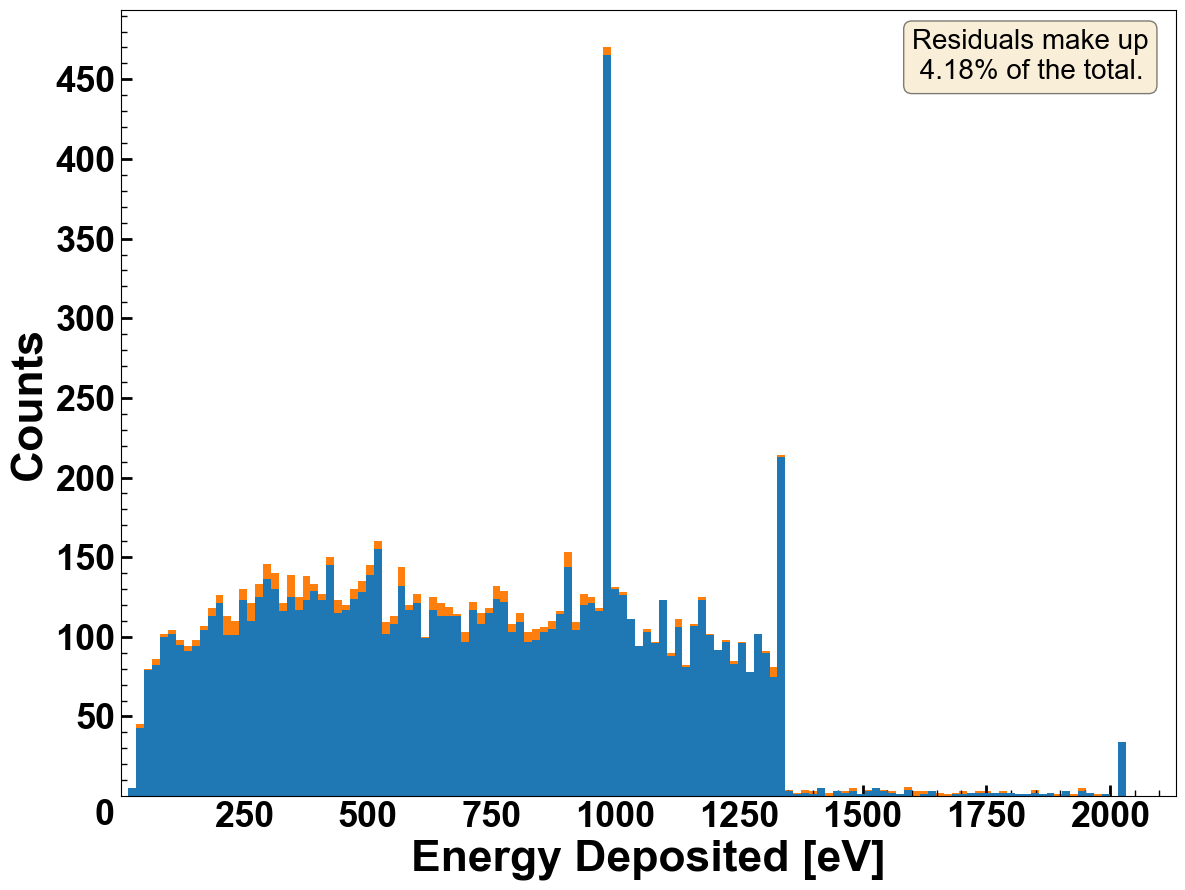

In [3]:
fig = plt.figure(figsize=(12,9))

binsize = 16
bins = np.arange(0,max(np.append(h1,hres))+binsize,binsize)

plt.hist(h1,label=['Dominant cascades','Residual cacades'],
         bins=bins,histtype='step',fill=True,color='tab:blue',linewidth=0)
plt.hist([h1,hres],label=['Dominant cascades','Residual cacades'],
         stacked=True,bins=bins)#,histtype='step',fill=True)
plt.xlim(0)

plt.xlabel('Energy Deposited [eV]',fontweight='bold'); plt.ylabel('Counts',fontweight='bold')
plt.xticks(fontsize=26,fontweight='bold'); plt.yticks(fontsize=26,fontweight='bold')
#plt.legend(loc='upper right') #legend will be in caption
#Fix overlapping zeros on the corner

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.text(-52,-18,"0",fontsize=26,fontweight='bold')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1600,450,"Residuals make up\n {:.2f}% of the total.".format(len(hres)/(len(h1)+len(hres))*100),bbox=props,fontsize=20)

plt.tight_layout()
plt.savefig('Residuals.pdf')
plt.show()

In [10]:
print("Portion from h1:",len(h1)/(len(hres)+len(h1)))
print("Mode of h1:",max(set(h1),key=list(h1).count))
print(h1)

Portion from h1: 0.9581619343834654
Mode of h1: 990.608007229594
[ 211.75410927  610.35903701 1152.87706956 ...  752.15834446  752.15834446
  752.15834446]


In [11]:
#Get mode of 1st excited state
first = h(cas[cas['cid']==2],model=None,method='pandas',resolution=None,flat=True)
print(max(set(first),key=list(first).count))

990.608007229594


In [6]:
max(cas[cas['cid']==2]['E'].to_numpy()[0])

960.5646867382115